> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`, 
* `title` - `str`, 
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`. 

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [1]:
#### Escreva sua resposta aqui

from dataclasses import dataclass
from enum import Enum

# Cria uma Enum para representar os níveis de dificuldade
class BiteLevel(Enum):
    Beginner = "Beginner"
    Intermediate = "Intermediate"
    Advanced = "Advanced"

# Cria a dataclass Bite
@dataclass(order=True)  # 'order=True' permite comparar objetos pelo primeiro campo (number)
class Bite:
    number: int
    title: str
    level: BiteLevel = BiteLevel.Beginner  # valor padrão

    def __post_init__(self):
        # Corrige se o nível foi passado como string, transformando em Enum
        if isinstance(self.level, str):
            self.level = BiteLevel[self.level]

    def __str__(self):
        # Representação amigável do objeto
        return f"{self.number} - {self.title} ({self.level.value})"

# Teste solicitado
if __name__ == "__main__":
    bites = []
    bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
    bites.append(Bite(1, 'Some n valores'))  # sem nível → Beginner
    bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

    # Ordena pela dataclass (usa o número automaticamente)
    for b in sorted(bites):
        print(b)

1 - Some n valores (Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`). 
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [ ]:
!pip install pydantic

!pip install pydantic requests plotly pandas

In [3]:
#### Escreva sua resposta aqui

from pydantic import BaseModel, field_validator
from typing import Optional
from datetime import datetime

class Weather(BaseModel):
    date: datetime
    temperature: float
    isCelsius: bool = True
    airQualityIndex: Optional[int] = None
    sunriseTime: Optional[str] = None
    sunsetTime: Optional[str] = None

    # Normaliza isCelsius (aceita 'true', '1', 'yes', 'not true', etc.)
    @field_validator('isCelsius', mode='before')
    def normalizar_is_celsius(cls, v):
        if isinstance(v, bool):
            return v
        if isinstance(v, str):
            return v.lower() in ('true', '1', 'yes')
        return bool(v)

    # Converte string de temperatura para float
    @field_validator('temperature', mode='before')
    def converter_para_float(cls, v):
        return float(v)

    # Pós-processamento (executa depois que todos os campos foram validados)
    def model_post_init(self, __context):
        """Converte Fahrenheit → Celsius se isCelsius for False."""
        if not self.isCelsius:
            self.temperature = round((self.temperature - 32) * 5 / 9, 2)

# --- Dados do enunciado ---
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

# --- Cria as instâncias e calcula a média ---
amostras = [Weather(**d) for d in data_samples]

for s in amostras:
    print(f"{s.date.date()} → {s.temperature}°C (isCelsius={s.isCelsius})")

media = sum(s.temperature for s in amostras) / len(amostras)
print(f"\nTemperatura média em Murmansk: {media:.2f}°C")

2023-05-20 → 16.78°C (isCelsius=False)
2023-05-21 → 18.0°C (isCelsius=False)
2023-05-22 → 14.4°C (isCelsius=True)

Temperatura média em Murmansk: 16.39°C


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ... 
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
``` 

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [4]:
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.05900859832763672,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2025-10-15T00:00",
      "2025-10-15T01:00",
      "2025-10-15T02:00",
      "2025-10-15T03:00",
      "2025-10-15T04:00",
      "2025-10-15T05:00",
      "2025-10-15T06:00",
      "2025-10-15T07:00",
      "2025-10-15T08:00",
      "2025-10-15T09:00",
      "2025-10-15T10:00",
      "2025-10-15T11:00",
      "2025-10-15T12:00",
      "2025-10-15T13:00",
      "2025-10-15T14:00",
      "2025-10-15T15:00",
      "2025-10-15T16:00",
      "2025-10-15T17:00",
      "2025-10-15T18:00",
      "2025-10-15T19:00",
      "2025-10-15T20:00",
      "2025-10-15T21:00",
      "2025-10-15T22:00",
      "2025-10-15T23:00",
      "2025-10-16T00:00",
      "2025-10-16T01:00",
      "2025-10-16T02:00

In [5]:
#### Escreva aqui seus modelos Pydantic

from pydantic import BaseModel
from typing import List
import requests, json

# Classes auxiliares internas (aninhadas)
class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[str]
    temperature_2m: List[float]

# Classe principal
class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

# ======================================================
# Obtenção dos dados reais da API Open-Meteo
# ======================================================

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476  # Itabira - MG
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()

# Validação com Pydantic
dados = OpenMeteo(**response)

# Exemplo de exibição
print(f"Cidade aproximada: Itabira")
print(f"Número de registros: {len(dados.hourly.time)}")
print(f"Primeiro registro: {dados.hourly.time[0]} → {dados.hourly.temperature_2m[0]}°C")

Cidade aproximada: Itabira
Número de registros: 360
Primeiro registro: 2025-10-15T00:00 → 23.8°C


#### Q4. 

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

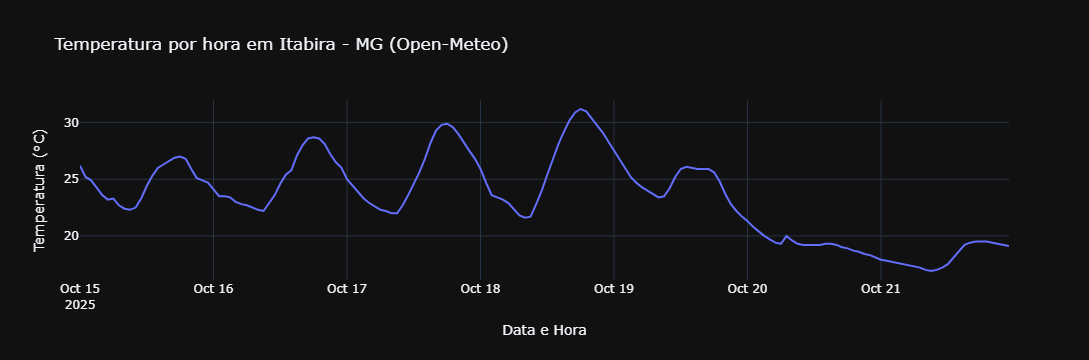

In [2]:
#### Escreva aqui a sua resposta

import requests
import pandas as pd
import plotly.express as px

# Requisição da API Open-Meteo para Itabira
url = "https://api.open-meteo.com/v1/forecast?latitude=-19.6237&longitude=-42.1379&hourly=temperature_2m"
resposta = requests.get(url)      # Faz a requisição
dados = resposta.json()           # Converte o JSON em dicionário Python

# Cria o DataFrame com horários e temperaturas
df = pd.DataFrame({
    "time": dados["hourly"]["time"],
    "temperature": dados["hourly"]["temperature_2m"]
})

# Cria o gráfico interativo
fig = px.line(df, x="time", y="temperature",
              title="Temperatura por hora em Itabira - MG (Open-Meteo)",
              labels={"time": "Data e Hora", "temperature": "Temperatura (°C)"},
              template="plotly_dark")

fig.show()